In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
train = pd.read_csv('data/train.csv', encoding='ms949')
test = pd.read_csv('data/test.csv', encoding='ms949')
train_ = train.copy()
test_ = test.copy()

In [237]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [238]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### Data Dictionary

- Survived : 0 = 사망, 1 = 생존
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [239]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [241]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [242]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

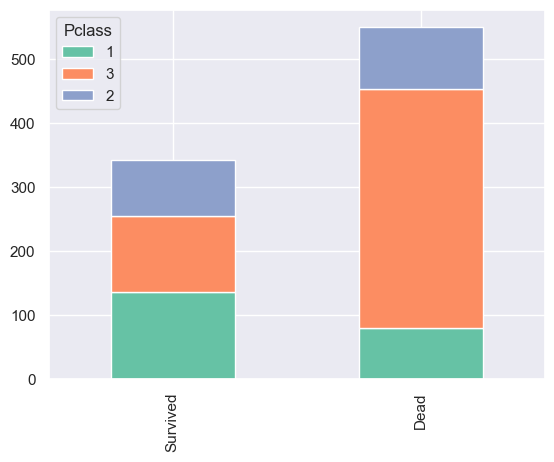

In [243]:
chart(train, 'Pclass')

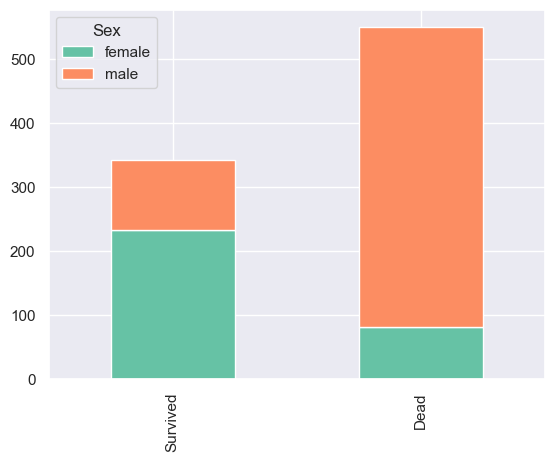

In [244]:
chart(train, 'Sex')

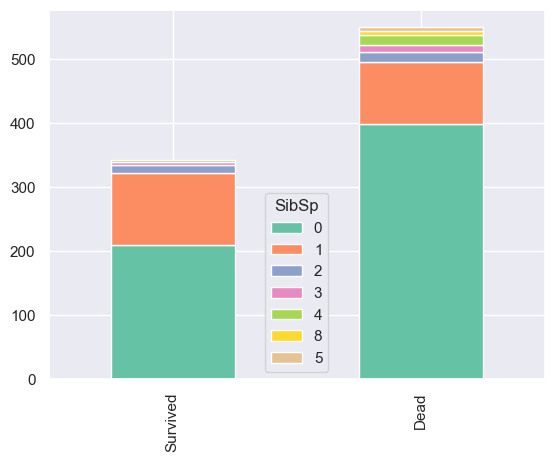

In [245]:
chart(train, 'SibSp')

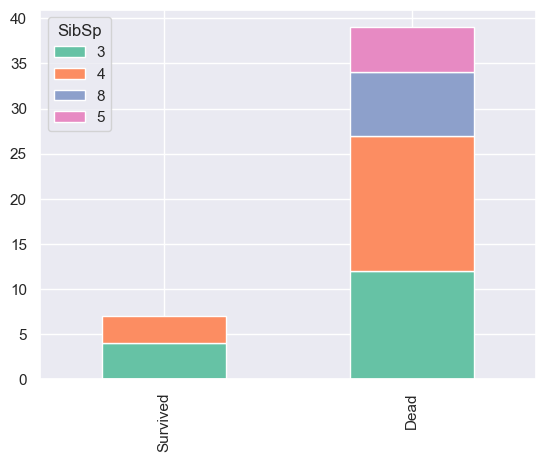

In [246]:
temp = train[train['SibSp']>2]
chart(temp, 'SibSp')

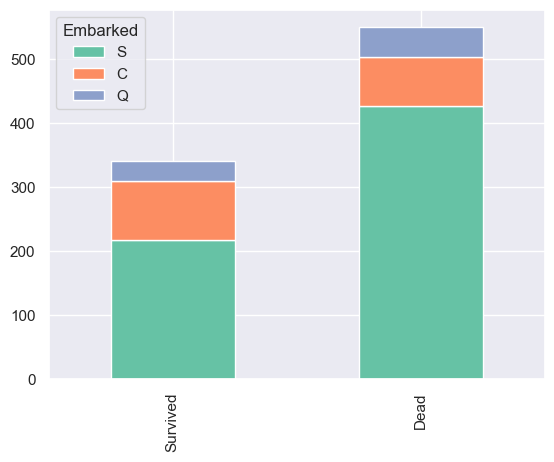

In [247]:
chart(train,'Embarked')

In [248]:
S = train[train['Embarked']=='S']['Pclass'].value_counts()
S

Pclass
3    353
2    164
1    127
Name: count, dtype: int64

In [249]:
C = train[train['Embarked']=='C']['Pclass'].value_counts()
C

Pclass
1    85
3    66
2    17
Name: count, dtype: int64

In [250]:
Q = train[train['Embarked']=='Q']['Pclass'].value_counts()
Q

Pclass
3    72
2     3
1     2
Name: count, dtype: int64

<Axes: >

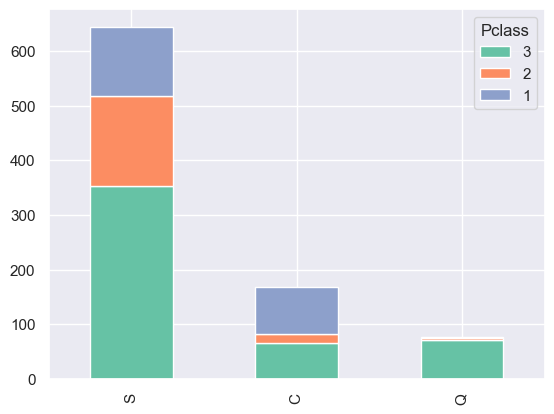

In [251]:
S = train[train['Embarked']=='S']['Pclass'].value_counts()
C = train[train['Embarked']=='C']['Pclass'].value_counts()
Q = train[train['Embarked']=='Q']['Pclass'].value_counts()
df = pd.DataFrame([S,C,Q])
df.index = ['S','C','Q']
df.plot(kind='bar',stacked=True)

In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 남자 : 0 여자: 1로 변환
- map사용

In [253]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [254]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [255]:
dic = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(dic)
test['Embarked'] = test['Embarked'].map(dic)

In [256]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0


In [257]:
test = test.copy()
test2.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,2
2,894,2,0,62.0,0,0,9.6875,2,0


In [258]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

#### Prefix
- 두번째에 위치하고 있음 : str.split(',')[1]
- 두번째의 prefix는 마침표가 있음 : str.split('.')[0]
- 공백을 제거해야함 : str.split()

In [259]:
names = ['"Braund, Mr. Owen Harris"',
'"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"',
'"Heikkinen, Miss. Laina"',
'"Futrelle, Mrs. Jacques Heath (Lily May Peel)"',
'"Allen, Mr. William Henry"']
df = pd.DataFrame(names, columns=['Name'])
df['Name'].apply(lambda x : x.split(",")[1].split(".")[0].strip())

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [260]:
train['Prefix'] = train['Name'].apply(lambda x : x.split(",")[1].split(".")[0].strip())

In [261]:
test['Prefix'] = test['Name'].apply(lambda x : x.split(",")[1].split(".")[0].strip())

In [262]:
train['Prefix']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Prefix, Length: 891, dtype: object

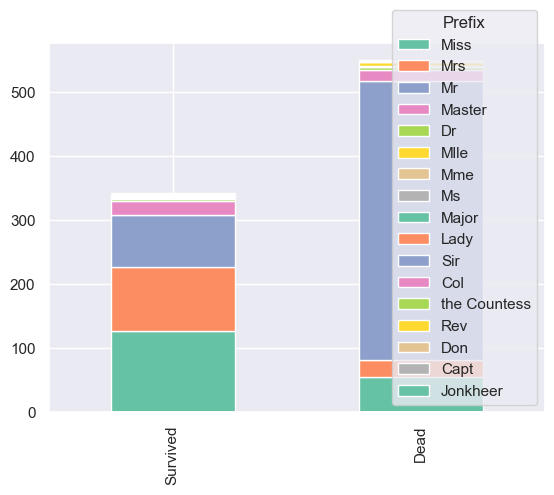

In [263]:
chart(train,'Prefix')

In [264]:
train['Prefix'].value_counts()

Prefix
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [265]:
train['Prefix'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [266]:
dic = {'Mr':0, 'Miss':1,'Mrs':2, 'Master':3, 
       'Dr':4, 'Rev':4,'Mlle':4,'Major':4,'Mme':4, 'Ms':4,
       'Lady':4, 'Sir':4, 'Col':4, 'Capt':4,
       'the Countess':4, 'Jonkheer':4, 'Don':4}

train['Prefix'] = train['Prefix'].map(dic)

In [267]:
test['Prefix'].value_counts()

Prefix
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [268]:
test['Prefix'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [269]:
dic = {'Mr':0, 'Miss':1,'Mrs':2, 'Master':3, 
       'Ms':4,'Col':4,'Rev':4,'Dr':4,'Dona':4}
test['Prefix'] = test['Prefix'].map(dic)

In [270]:
train['Prefix']

0      0
1      2
2      1
3      2
4      0
      ..
886    4
887    1
888    1
889    0
890    0
Name: Prefix, Length: 891, dtype: int64

In [271]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1


In [272]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0


#### 'Name'삭제
- prefix로 대체

In [273]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [274]:
train.head(n=3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1


In [275]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,2,0


<Axes: >

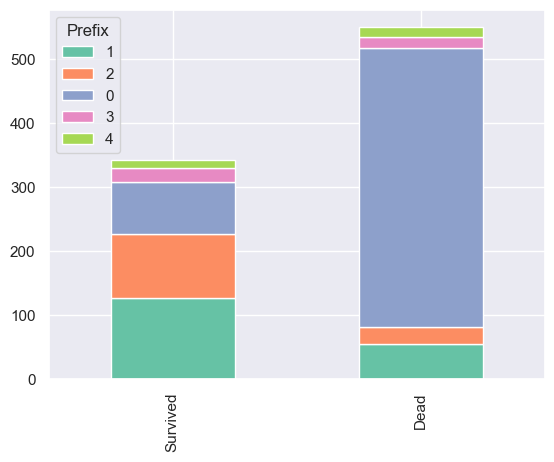

In [276]:
survived = train[train['Survived']==1]['Prefix'].value_counts()
dead = train[train['Survived']==0]['Prefix'].value_counts()

df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True)

### Age 결측치 채우기

- train데이터의 age결측치 채우기

In [277]:
prefix_mean = train.groupby('Prefix')['Age'].mean()
for i in range(len(prefix_mean)):
    mean = train[train['Prefix']==i]['Age'].mean()
    train.loc[train['Prefix']==i,'Age'] = train.loc[train['Prefix']==i,'Age'].fillna(mean)

In [278]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    float64
 11  Prefix       891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


- test데이터의 age 결측치 채우기

In [279]:
prefix_mean = test.groupby('Prefix')['Age'].mean()
for i in range(len(prefix_mean)):
    mean = test[test['Prefix']==i]['Age'].mean()
    test.loc[test['Prefix']==i,'Age'] = test.loc[test['Prefix']==i,'Age'].fillna(mean)

In [280]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Prefix       418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.1+ KB


### Agecut만들기

In [281]:
train['Age'].describe()

count    891.000000
mean      29.755090
std       13.277584
min        0.420000
25%       21.773973
50%       30.000000
75%       35.898148
max       80.000000
Name: Age, dtype: float64

In [282]:
train['AgeCut'] = pd.qcut(train['Age'], 4, labels=[0,1,2,3])
train['AgeCut']

0      1
1      3
2      1
3      2
4      2
      ..
886    1
887    0
888    0
889    1
890    2
Name: AgeCut, Length: 891, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [289]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    float64 
 11  Prefix       891 non-null    int64   
 12  AgeCut       891 non-null    category
dtypes: category(1), float64(3), int64(7), object(2)
memory usage: 84.7+ KB


In [284]:
test['Age'].describe()

count    418.000000
mean      30.243635
std       13.027109
min        0.170000
25%       22.000000
50%       30.000000
75%       37.000000
max       76.000000
Name: Age, dtype: float64

In [285]:
# train데이터를 기준으로 cut을 진행
test['AgeCut'] = pd.qcut(train['Age'], 4, labels=[0,1,2,3])
test['AgeCut']

0      1
1      3
2      1
3      2
4      2
      ..
413    2
414    3
415    2
416    2
417    0
Name: AgeCut, Length: 418, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [288]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Ticket       418 non-null    object  
 7   Fare         417 non-null    float64 
 8   Cabin        91 non-null     object  
 9   Embarked     418 non-null    int64   
 10  Prefix       418 non-null    int64   
 11  AgeCut       418 non-null    category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 36.7+ KB


### Fare 데이터의 결측치 채우기
- test데이터만 결측치 있음

In [290]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Ticket       418 non-null    object  
 7   Fare         417 non-null    float64 
 8   Cabin        91 non-null     object  
 9   Embarked     418 non-null    int64   
 10  Prefix       418 non-null    int64   
 11  AgeCut       418 non-null    category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 36.7+ KB


In [291]:
test2 = test.copy()
test2.drop(['Ticket','Cabin','AgeCut'], axis=1, inplace=True)
test_pclass_mean = test2.groupby('Pclass').mean()
for i in range(1,(len(test_pclass_mean)+1)):
    mean = test2[test2['Pclass']==i]['Fare'].mean()
    test2.loc[test2['Pclass']==i,'Fare'] = test2.loc[test2['Pclass']==i,'Fare'].fillna(mean)

test['Fare'] = test2['Fare']

In [292]:
test_pclass_mean

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
Pclass,,,,,,,,
1,1098.224299,0.467290,40.297257,0.476636,0.383178,94.280297,0.542056,0.990654
2,1117.935484,0.322581,29.024981,0.376344,0.344086,22.202104,0.204301,0.623656
3,1094.178899,0.330275,25.828943,0.463303,0.417431,12.459678,0.536697,0.683486


In [293]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Ticket       418 non-null    object  
 7   Fare         418 non-null    float64 
 8   Cabin        91 non-null     object  
 9   Embarked     418 non-null    int64   
 10  Prefix       418 non-null    int64   
 11  AgeCut       418 non-null    category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 36.7+ KB


#### FareCut 생성

In [295]:
train['FareCut'] = pd.qcut(train['Fare'], 4, labels=[0,1,2,3])
train['FareCut']

0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: FareCut, Length: 891, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [296]:
test['FareCut'] = pd.qcut(train['Fare'], 4, labels=[0,1,2,3])
test['FareCut']

0      0
1      3
2      1
3      3
4      1
      ..
413    0
414    1
415    1
416    3
417    1
Name: FareCut, Length: 418, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [297]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,AgeCut,FareCut
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,1,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,3,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,1,1


### 불필요 컬럼 삭제

In [298]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Prefix', 'AgeCut', 'FareCut'],
      dtype='object')

In [299]:
train.drop(['Age','Ticket', 'Fare', 'Cabin'],axis=1, inplace=True)
test.drop(['Age','Ticket', 'Fare', 'Cabin'],axis=1, inplace=True)

In [300]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Prefix,AgeCut,FareCut
0,1,0,3,0,1,0,0.0,0,1,0
1,2,1,1,1,1,0,1.0,2,3,3
2,3,1,3,1,0,0,0.0,1,1,1


In [301]:
test.head(3)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Prefix,AgeCut,FareCut
0,892,3,0,0,0,2,0,1,0
1,893,3,1,1,0,0,2,3,3
2,894,2,0,0,0,2,0,1,1


### 마지막 확인

In [302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Embarked     889 non-null    float64 
 7   Prefix       891 non-null    int64   
 8   AgeCut       891 non-null    category
 9   FareCut      891 non-null    category
dtypes: category(2), float64(1), int64(7)
memory usage: 58.0 KB


In [304]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       2
Prefix         0
AgeCut         0
FareCut        0
dtype: int64

In [303]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Embarked     418 non-null    int64   
 6   Prefix       418 non-null    int64   
 7   AgeCut       418 non-null    category
 8   FareCut      418 non-null    category
dtypes: category(2), int64(7)
memory usage: 24.2 KB


In [305]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
Prefix         0
AgeCut         0
FareCut        0
dtype: int64

### train데이터의 결측치 확인
- Embarked 데이터 2개 결측 확인

In [306]:
train = train.dropna(axis=0)
test = test.dropna(axis=0)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
Prefix         0
AgeCut         0
FareCut        0
dtype: int64

In [307]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    int64   
 4   SibSp        889 non-null    int64   
 5   Parch        889 non-null    int64   
 6   Embarked     889 non-null    float64 
 7   Prefix       889 non-null    int64   
 8   AgeCut       889 non-null    category
 9   FareCut      889 non-null    category
dtypes: category(2), float64(1), int64(7)
memory usage: 64.6 KB


### PassengerId  index 설정

In [308]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [309]:
train.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Prefix,AgeCut,FareCut
PassengerId,,,,,,,,,
1,0,3,0,1,0,0.0,0,1,0
2,1,1,1,1,0,1.0,2,3,3
3,1,3,1,0,0,0.0,1,1,1


In [310]:
test.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Prefix,AgeCut,FareCut
PassengerId,,,,,,,,
892,3,0,0,0,2,0,1,0
893,3,1,1,0,0,2,3,3
894,2,0,0,0,2,0,1,1


#### 머신러닝 알고리즘 적용

In [311]:
from sklearn.svm import SVC   #머신러닝 알고리즘, 이하 동일
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [312]:
import numpy as np
from sklearn.model_selection import KFold #측정기에 매개변수로 사용(뭔지 모름)
from sklearn.model_selection import cross_val_score #스코어 측정기
k_fold = KFold(n_splits=20, shuffle=True, random_state=0)

In [318]:
train.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Prefix,AgeCut,FareCut
PassengerId,,,,,,,,,
1,0,3,0,1,0,0.0,0,1,0
2,1,1,1,1,0,1.0,2,3,3
3,1,3,1,0,0,0.0,1,1,1


In [320]:
label = train['Survived']
train.drop('Survived',axis=1, inplace=True)
train.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Prefix,AgeCut,FareCut
PassengerId,,,,,,,,
1,3,0,1,0,0.0,0,1,0
2,1,1,1,0,1.0,2,3,3
3,3,1,0,0,0.0,1,1,1


In [322]:
clf = SVC(gamma='auto') # 알고리즘 불러오기
scoring = 'accuracy'
score = cross_val_score(clf, train, label, cv=k_fold, n_jobs=1, scoring=scoring) #스코어 측정
print(score)
print("점수 평균 : " + str(round(np.mean(score)*100, 2)))

[0.73333333 0.73333333 0.73333333 0.75555556 0.91111111 0.84444444
 0.73333333 0.86666667 0.93333333 0.86363636 0.84090909 0.75
 0.90909091 0.88636364 0.79545455 0.77272727 0.79545455 0.84090909
 0.90909091 0.86363636]
점수 평균 : 82.36


In [323]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, label, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("점수 평균 : " + str(round(np.mean(score)*100, 2)))

[0.73333333 0.73333333 0.73333333 0.73333333 0.88888889 0.84444444
 0.71111111 0.88888889 0.91111111 0.88636364 0.81818182 0.77272727
 0.90909091 0.88636364 0.75       0.75       0.81818182 0.86363636
 0.88636364 0.88636364]
점수 평균 : 82.03


In [324]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, label, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("점수 평균 : " + str(round(np.mean(score)*100, 2)))

[0.75555556 0.66666667 0.75555556 0.75555556 0.82222222 0.8
 0.66666667 0.84444444 0.84444444 0.81818182 0.77272727 0.79545455
 0.88636364 0.84090909 0.79545455 0.77272727 0.79545455 0.79545455
 0.72727273 0.84090909]
점수 평균 : 78.76


In [325]:
clf = RandomForestClassifier(n_estimators=20)
scoring = 'accuracy'
score = cross_val_score(clf, train, label, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("점수 평균 : " + str(round(np.mean(score)*100, 2)))

[0.75555556 0.66666667 0.75555556 0.73333333 0.84444444 0.8
 0.66666667 0.84444444 0.84444444 0.84090909 0.75       0.79545455
 0.86363636 0.86363636 0.79545455 0.75       0.81818182 0.81818182
 0.75       0.86363636]
점수 평균 : 79.1


In [326]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train, label, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("점수 평균 : " + str(round(np.mean(score)*100, 2)))

[0.71111111 0.66666667 0.75555556 0.73333333 0.86666667 0.84444444
 0.71111111 0.88888889 0.86666667 0.88636364 0.79545455 0.72727273
 0.88636364 0.84090909 0.79545455 0.70454545 0.75       0.79545455
 0.79545455 0.88636364]
점수 평균 : 79.54


In [327]:
clf = SVC(gamma='auto') 
clf.fit(train, label)
prediction = clf.predict(test)
pred = pd.DataFrame({"PassengerId":test.index, "Survived":prediction})
pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
